In [4]:
#importing libraries
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [9]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [10]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...,NaN,NaN,NaN
2893,ham,K...k...yesterday i was in cbe .,NaN,NaN,NaN
949,ham,Is that what time you want me to come?,NaN,NaN,NaN
1995,ham,Shall i come to get pickle,NaN,NaN,NaN
5169,ham,Now i'm going for lunch.,NaN,NaN,NaN
4090,ham,Hey doc pls I want to get nice t shirt for my ...,NaN,NaN,NaN
3032,ham,"Aight, lemme know what's up",NaN,NaN,NaN
4452,ham,Or I guess &lt;#&gt; min,NaN,NaN,NaN
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...,NaN,NaN,NaN
3781,ham,How r Ì_ going to send it to me?,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.sample(5)

,v1,v2
4152,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...
4719,ham,Forgot to tell Ì_ smth.. Can Ì_ like number th...
1796,ham,"Hey, can you tell me blake's address? Carlos w..."
2912,ham,Kindly send some one to our flat before &lt;D...
2429,spam,Guess who am I?This is the first time I create...


In [16]:
df.columns = ['category','Message']

In [17]:
df.head(10)

,category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
df['category'].value_counts()

category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='category'>

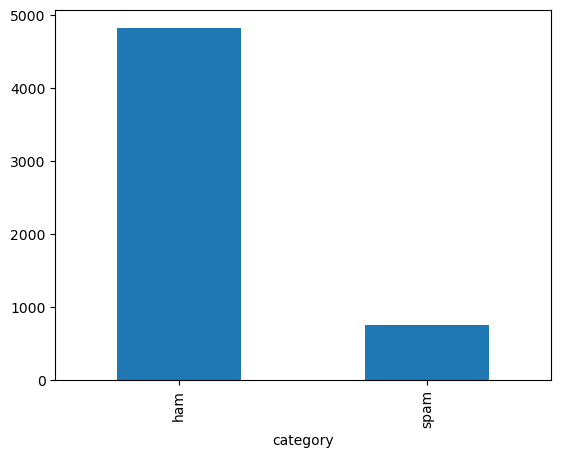

In [19]:
df['category'].value_counts().plot(kind='bar')

In [21]:
df['spam']=df['category'].apply(lambda x:'SPAM' if x =='spam'else 'NOT SPAM')

In [22]:
df.head(10)

,category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NOT SPAM
1,ham,Ok lar... Joking wif u oni...,NOT SPAM
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,SPAM
3,ham,U dun say so early hor... U c already then say...,NOT SPAM
4,ham,"Nah I don't think he goes to usf, he lives aro...",NOT SPAM
5,spam,FreeMsg Hey there darling it's been 3 week's n...,SPAM
6,ham,Even my brother is not like to speak with me. ...,NOT SPAM
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NOT SPAM
8,spam,WINNER!! As a valued network customer you have...,SPAM
9,spam,Had your mobile 11 months or more? U R entitle...,SPAM


In [23]:
x = np.array(df["Message"]) 
y = np.array(df["spam"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [24]:
sample = input('Enter a message: ')
df = cv.transform([sample]).toarray()
print(clf.predict(df))

Enter a message:  URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18


['SPAM']


In [25]:
sample = input('Enter a message: ')
df = cv.transform([sample]).toarray()
print(clf.predict(df))

Enter a message:  Is that seriously how you spell his name?


['NOT SPAM']


In [26]:
clf.score(X_test,y_test)

0.9784688995215312